In [8]:
import matplotlib.pyplot as plt
from sympy import lambdify, Symbol
import math
import numpy as np

In [9]:
def F1(x):
    return (math.cos(x))*(math.sinh(math.sin(x)))

In [10]:
def F2(x):
    return (math.cos(x)*math.cos(x))*(math.cosh(math.sin(x))) - (math.sin(x)*math.sinh(math.sin(x)))

In [14]:
#print('input count of points')
#n = int(input())
n=11
#h = 3/(n-1)
#X = np.linspace(-1.5, 1.5, n)
X, h = np.linspace(-1.5, 1.5, n, retstep=True)
Y = list()
for i in range(n):
    Y.append(math.cosh(math.sin(X[i]))) 

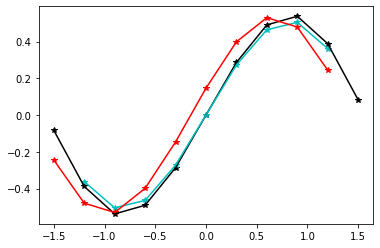

In [15]:
d1_right = list() #первые производные, правые разности
d1_centr = list() #первые производные,  центральные разности

#Первые производные, правая разность
X_r = list()
for i in range(n-1):
    d1_right.append((Y[i+1]-Y[i])/h)
    X_r.append(X[i])

#первые производные, центральная разность
X_с = list()
for i in range(1,n-1):
    d1_centr.append((Y[i+1]-Y[i-1])/(2*h))
    X_с.append(X[i])

diff1 = list()
for i in range(n):
    diff1.append(F1(X[i]))

plt.plot(X, diff1, 'k*')#производная
plt.plot(X_с, d1_centr,'c*')#центральная
plt.plot(X_r, d1_right,'r*') #правая
plt.plot(X, diff1, 'k')
plt.plot(X_с, d1_centr,'c')
plt.plot(X_r, d1_right,'r') 
plt.show()


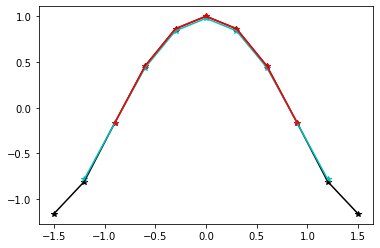

In [16]:
d2_centr2 = list() #вторые производные, второй порядок, центральные разности
d2_centr4 = list() #вторые производные, четвертый порядок, центральные разности

#второй порядок точности
X2 = list()
for i in range(1,n-1):
    d2_centr2.append((Y[i+1]-2*Y[i]+Y[i-1])/(h**2))
    X2.append(X[i])
#четвертый порядок точности
X4 = list()
for i in range(2,n-2):
    d2_centr4.append((-Y[i+2]+16*Y[i+1]-30*Y[i]+16*Y[i-1]-Y[i-2])/(12*(h**2)))
    X4.append(X[i])
    
diff2 = list()
for i in range(n):
    diff2.append(F2(X[i]))
    
plt.plot(X, diff2, 'k*')#производная
plt.plot(X2, d2_centr2,'c*')#2
plt.plot(X4, d2_centr4,'r*') #правая
plt.plot(X, diff2, 'k')
plt.plot(X2, d2_centr2,'c')
plt.plot(X4, d2_centr4,'r') 
plt.show()
